### **📷 CNN Image Classifier**
In this notebook, a simple multi-class image classifier is trained.

- `Dataset:` [Intel-Image-Classification from Kaggle](https://www.kaggle.com/datasets/puneet6060/intel-image-classification?resource=download)
- `Classes:` glacier, sea, buildings, forest, street, mountain

In [1]:
import tensorflow as tf
from sklearn.utils import shuffle
import numpy as np
from utils import *
from keras.utils.vis_utils import model_to_dot
from models import *
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

### **Setup**

In [2]:
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    print(gpu)
if len(gpus) == 0:
    print("No GPU power! 😭")

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


### **Data Import**

Labels:
- `0` for `Building`
- `1` for `Forest`
- `2` for `Glacier`
- `3` for `Mountain`
- `4` for `Sea`
- `5` for `Street`

In [3]:
TRAIN_DATA_DIR = r"D:/HPA/cnn_experiments/data/seg_train/seg_train/"
SEED = 42
IMAGE_MAX_SIZE = 150 # Resize the image, Some images are different sizes. (Resizing is very Important). We know size of dataset is always around 150

In [4]:
images, labels = get_images(TRAIN_DATA_DIR, SEED)
images = resize_images(images, IMAGE_MAX_SIZE)

# Converting to numpy arrays
images = np.array(images)
labels = np.array(labels)

print("Shape of images: ", images.shape)
print("Shape of labels: ", labels.shape)

Shape of images:  (14034, 150, 150, 3)
Shape of labels:  (14034,)


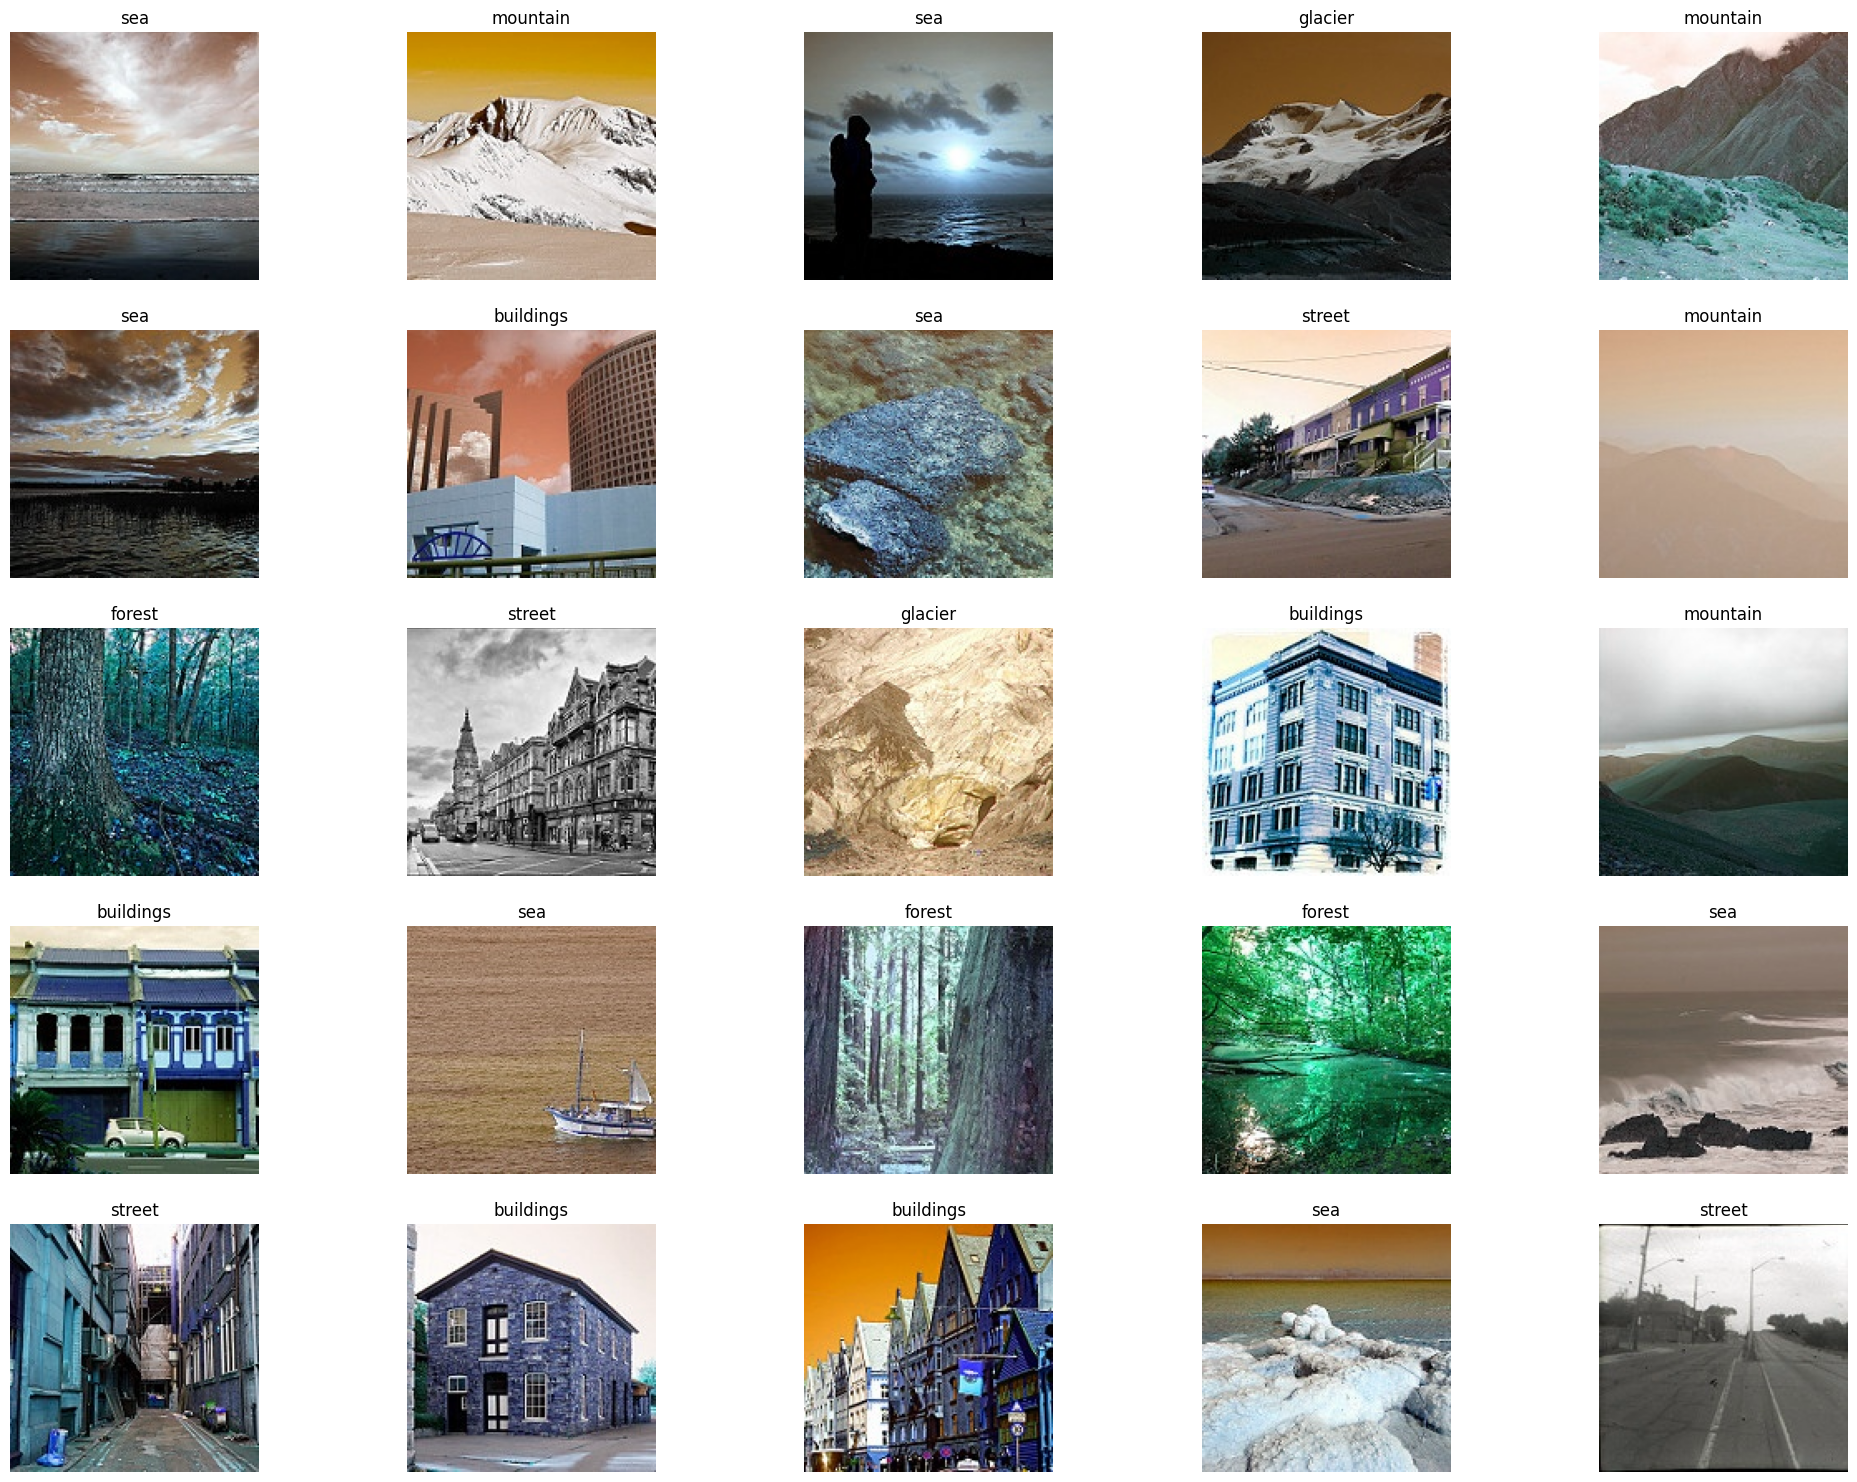

In [5]:
viz_random_images(images, labels)

## **Preprocessing & Encoding**

In [6]:
MAX_VALUE = images.max() # Should be 255
MIN_VALUE = images.min() # Should be 0
print("min: " + str(MIN_VALUE) + " | max: " + str(MAX_VALUE))
# Scaling from 0 to 1
images = images/MAX_VALUE
images[0][0][0]

min: 0 | max: 255


array([0.98039216, 0.98039216, 0.98039216])

In [7]:
num_classes = np.max(labels) + 1
labels = to_categorical(labels, num_classes)

## **Dataset Split**

In [8]:
print(f"Total len: {len(images)}")

TRAIN_SPLIT = 0.7
VAL_SPLIT = 0.2
TEST_SPLIT = 0.1

train_size = int(len(images)*TRAIN_SPLIT)
val_size = int(len(images)*VAL_SPLIT)+1
test_size = int(len(images)*TEST_SPLIT)+1

train_imgs=images[0:train_size]
val_imgs=images[train_size:train_size+val_size]
test_imgs=images[train_size+val_size:]

train_lbs=labels[0:train_size]
val_lbs=labels[train_size:train_size+val_size]
test_lbs=labels[train_size+val_size:]


Total len: 14034


### **👶🏻 Simple Model Training**

In [9]:
model_1 = build_model_1(num_classes, IMAGE_MAX_SIZE)
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

In [10]:
MAX_EPOCHS = 40
BATCH_SIZE = 16

early_stopping = EarlyStopping(monitor='val_loss', patience=2)
hist_1 = model_1.fit(train_imgs, train_lbs, epochs=MAX_EPOCHS, batch_size=BATCH_SIZE, validation_data=(val_imgs, val_lbs), callbacks=[early_stopping])

Epoch 1/40
614/614 [==============================] - 22s 24ms/step - loss: 1.0529 - accuracy: 0.5890 - val_loss: 0.8513 - val_accuracy: 0.6801
Epoch 2/40
614/614 [==============================] - 11s 18ms/step - loss: 0.7517 - accuracy: 0.7175 - val_loss: 0.7750 - val_accuracy: 0.7121
Epoch 3/40
614/614 [==============================] - 11s 18ms/step - loss: 0.6094 - accuracy: 0.7748 - val_loss: 0.6368 - val_accuracy: 0.7595
Epoch 4/40
614/614 [==============================] - 11s 18ms/step - loss: 0.4834 - accuracy: 0.8221 - val_loss: 0.6516 - val_accuracy: 0.7813
Epoch 5/40
614/614 [==============================] - 12s 19ms/step - loss: 0.3777 - accuracy: 0.8621 - val_loss: 0.6634 - val_accuracy: 0.7816


In [11]:
plot_train_history(hist_1)

In [12]:
test_loss, test_accuracy = model_1.evaluate(test_imgs, test_lbs, batch_size=BATCH_SIZE)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

test_loss, test_accuracy = model_1.evaluate(val_imgs, val_lbs, batch_size=BATCH_SIZE)
print("Val Loss:", test_loss)
print("Val Accuracy:", test_accuracy)

88/88 [==============================] - 1s 10ms/step - loss: 0.5933 - accuracy: 0.7927
Test Loss: 0.593322217464447
Test Accuracy: 0.7927350401878357
176/176 [==============================] - 2s 10ms/step - loss: 0.6634 - accuracy: 0.7816
Val Loss: 0.6633555889129639
Val Accuracy: 0.7816174030303955


### **👨🏻 Bigger Model Training**

In [15]:
model_2 = build_model_2(num_classes, IMAGE_MAX_SIZE)
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 200)     5600      
                                                                 
 conv2d_10 (Conv2D)          (None, 146, 146, 180)     324180    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 29, 29, 180)      0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 27, 27, 180)       291780    
                                                                 
 conv2d_12 (Conv2D)          (None, 25, 25, 140)       226940    
                                                                 
 conv2d_13 (Conv2D)          (None, 23, 23, 100)       126100    
                                                      

In [16]:
MAX_EPOCHS = 40
BATCH_SIZE = 16

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
hist_2 = model_2.fit(train_imgs, train_lbs, epochs=MAX_EPOCHS, batch_size=BATCH_SIZE, validation_data=(val_imgs, val_lbs), callbacks=[early_stopping])

Epoch 1/40
614/614 [==============================] - 64s 91ms/step - loss: 1.2143 - accuracy: 0.4958 - val_loss: 1.0408 - val_accuracy: 0.5971
Epoch 2/40
614/614 [==============================] - 61s 99ms/step - loss: 0.9554 - accuracy: 0.6144 - val_loss: 0.9053 - val_accuracy: 0.6509
Epoch 3/40
614/614 [==============================] - 61s 99ms/step - loss: 0.8470 - accuracy: 0.6636 - val_loss: 0.7660 - val_accuracy: 0.7129
Epoch 4/40
614/614 [==============================] - 61s 99ms/step - loss: 0.7596 - accuracy: 0.7101 - val_loss: 0.6943 - val_accuracy: 0.7367
Epoch 5/40
614/614 [==============================] - 61s 99ms/step - loss: 0.6963 - accuracy: 0.7416 - val_loss: 0.6914 - val_accuracy: 0.7399
Epoch 6/40
614/614 [==============================] - 61s 99ms/step - loss: 0.6185 - accuracy: 0.7757 - val_loss: 0.6864 - val_accuracy: 0.7553
Epoch 7/40
614/614 [==============================] - 61s 99ms/step - loss: 0.5618 - accuracy: 0.7999 - val_loss: 0.5692 - val_accuracy:

In [17]:
plot_train_history(hist_2)

In [19]:
test_loss, test_accuracy = model_2.evaluate(test_imgs, test_lbs, batch_size=8)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

test_loss, test_accuracy = model_2.evaluate(val_imgs, val_lbs, batch_size=8)
print("Val Loss:", test_loss)
print("Val Accuracy:", test_accuracy)

176/176 [==============================] - 3s 15ms/step - loss: 0.6339 - accuracy: 0.7977
Test Loss: 0.6338998079299927
Test Accuracy: 0.7977207899093628
351/351 [==============================] - 8s 23ms/step - loss: 0.6193 - accuracy: 0.8019
Val Loss: 0.619335949420929
Val Accuracy: 0.8019237518310547


1/1 [==============================] - 0s 17ms/step
✅ Correct!
Predicted Category: forest
Real Category: forest


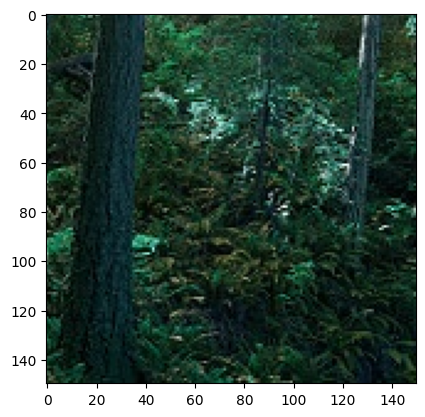

In [51]:
predict_random_image(model_2, test_imgs, test_lbs)